## Chapter 02. ML Basic(Lecture)

#### - ML 정의 

Q. What is Machine Learning? <br>
A. "A Field of study that gives computer the ability to learn without being explicity programmed" (Arthur Samuel, 1959)

<br>

#### - DL, ML AI의 관계도 
Deep Learning < Representation Learning(ex.shallow neural network) < Machine Learning(ex.logistic regression) < Artificial Intelligence(automated Planneing)

#### - Categories of ML Problems

|           | Supervised Learning | Unsupervised Learning    |  Reinforecement Learning     | 
| ------    | ------------------- | ------------------------ | ---------------------------- | 
| Discrete  |   Classification    |        Clustring         | Discrete Action space Agent  | 
| Continuous|   Regression        | Dimensionality Reduction | Continuous Action space Agent| 

(1) row 방향: output space <br>
(2) coclumn 방향: 학습 방법 <br>
(3) Semi-Supervised Learning -> Supervised Learning + Unsupervised Learning

<br>  

### 1. Supervised Learnig 
- input data(x)와 target(y, label) 둘 다 존재

#### [1] Regression

-> Fit the prediction function f(x) to the traning data to predict continuous real value(continuous space) <br>
-> type: Linear(선형), Nonlinear(비선형)

#### [2] Classification

-> identifying which of a set of categories a new instance belongs <br>
-> Decision Boundary(ex: Linear Classification) <br>
-> type: Binary(단일 분류), Multi-class(다중 분류)

<br>  

### 2. Unsupervised Learning
- target(y, label)이 존재하지 않음

#### [3] Clustring problem
-> Automatic grouping of instances, such that the instances that belong to the same clusters are more similar to each other than to those in the other groups <br>
-> Instances Similarity <br>
-> feature selection / feature extraction 활용

#### [4] Dimensionality Reduction
-> Reduce the dimension of input data, to avoid the effect of the curse of dimensionality <br> 
-> curse of dimensionatlity(차원의 저주), Reduce unnecessary representation axis <br>
-> PCA <br>
-> Other Algorithm using(feature & Data Represetation: CNN ) 

<br>

#### 참고자료
-> 우리가 풀고자하는 Domain 영역이 위의 내용 중에서 결정하는 

## Chapter 03. LInear Regression + How to minimize cost(Lecture)

### 1. Hypothesis(Simplified): $f(x) = wx + b$

### 2. Cost(loss) Function [모델의 정량적 평가]
-  How fit the line to our trainging data(which hypothesis is better?) <br>
-  Basic principle: $f(x) - y $

<br> 

#### 2-1. Regression cost (input: Hypothesis -> Goal: Minimize cost
- $ cost(W,b) = {1 \over m } {\sum_{k=1}^m (f(x^{i}) - y^{i})^2  } $  -> Minimize cost(w,b)

<br>

#### 2.2 How to reduce cost function(Updata Algorithm) 
- 간단한 Hypothesis의 경우는 Cost function 시각화 가능 <br> 
- Deep Learning의 경우 수 많은 parameter 존재 -> Cost function 시각화 불가 
- convex function(초기 Initialization에 따라 결과가 달라질 수 있음)
 -> Random experiment 후 결과값 평균 내는 방식 
<br>
<br>

[1] Start with initial guesses 
- Start at 0 or any other value <br>
- Keeping changing parameters(W and b) a little bit to try and reduce cost

[2] Each time you change the parameters, you select the gradient which reduces cost(W,b) most possible
- Gradient: Cost Differential(- $f \prime $)
- Formal definition(Gradient Updata / Optimization): $ W := W - \alpha {\partial f \over \partial W}cost(W) $ 

[3] Repeat [2]

[4] Do so until you converge to a local minimum

[5] Has an interesting property
- Where you start can determine which minimum you end up

#### 2.3 Multivariable linear regression
- Hypothesis using Matrx
 -> $$ f(x) = y(x,w) = w_{1}x_{1} + w_{2}x_{2} + \cdots + w_{n}x_{n} = \begin{bmatrix} w_{1} & \cdots & w_{n} \end{bmatrix}  \begin{bmatrix} x_{1} \\ \vdots \\  x_{n} \end{bmatrix} = w^Tx  = xw $$

 -> coding 간에는 Matrix x(미지수 행렬) dot Matrix w(계수 행렬)   


## Chapter 04. Linear Regression Pratice(Lab)

### 1. Data Generation(prepration)
- Linear Rgression 실습: 공부 시간(h)과 성적
- 해당 데이터(x, y) 2D 평면 상의 시각화

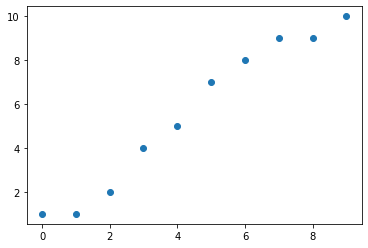

In [1]:
# data generation(simple data)
x = [i for i in range(10)]          # 공부 시간(x)
y = [1, 1, 2, 4, 5, 7, 8, 9, 9, 10] # 성적(y)

# data visualization
import matplotlib.pyplot as plt     # x, y 값을 가지고 line 그래프 그리기
#plt.plot(x, y)
plt.scatter(x, y) 

### 2. Hyppthesis Define 
- Linear Regression 활용하는 $ f(x) = WX + B $
- 여기서는 b(편향)이 없는 $ f(x) = WX $라는 모델(Hypothesis) 표현 

### 3. Cost function Define 
- Regression Problem 에서의 Cost Function을 작성(앞선 hypothesis가 얼마나 좋고 혹은 나쁜지 판단, cost function)

In [2]:
# Hyperthosis definition
class H(): # 일종의 template(model parameter w를 input으로 받음)
    def __init__(self, w): # intialization(input data) / Class의 Method에서 반드시 self 정의
      self.w = w           # Class에서 변수 정의하기 위해서 반드시 self 정의 

    def forward(self, x):  # forward 함수 사용, instance(sample) x가 input 들어오면 예측하는 값(linear regression)
        return self.w * x  

# cost function defintion 
def cost(h, X, Y):          
    error =  0              # error 초기화
    for i in range(len(X)): # input data 각각을 error 
        error += (h.forward(x[i]) - y[i]) ** 2  # cost function: MSE 

    error = error / len(x)  # error 평균(총 error / data 개수)
    return error

h = H(4)                                              # w = 1 -> H(1) 모델 생성
pred_y = h.forward(5)                                 # x = 5 -> instance(sample)이 input이 들어올 때
print('value of f(5) :', pred_y)                      # y = x (x = 5 일 때)
print('value of w :', h.w)                            # w(weight) 값 
print("The reuslt of Cost function:", cost(h, x, y))  # 모델이 관측한 dataset에 대해서 222.2 cost 가짐

value of f(5) : 20
value of w : 4
The reuslt of Cost function: 222.2


In [3]:
# 위의 코드 발전된 새로운 코드
# 위의 코드의 단점: cost caculation 할 때 cost function 내에 H(x)를 계산하여 개별적으로 구함
# 일반적: cost(loss) function는 true_y와 pred_y 각각 list만 받아서 구함(H(x) 적용하는 게 x) 

def better_cost(pred_y, true_y): 
    error = 0               # error 초기화
    for i in range(len(x)): # input data 각각을 error 구하기
        error += (pred_y[i] - true_y[i])**2  # Error function: MSE
    error = error / len(x)  # error 평균(총 error / data 개수)
    return error

pred_y = [ h.forward(x[i]) for i in range(len(x)) ]                      # 미리 모델 h를 통해서 각 x 인스턴스에 대한 y 값을 예측.
print('cost value with better code structure :', better_cost(pred_y, y)) # 222.2 라는 값 동일하게 나오는 것을 확인 

cost value with better code structure : 222.2


## 4. Cost Surface Visualization
- 위에서 정의한 weight에 대한 cost 확인
- w의 변화에 따라서, cost 변화 확인

Parameter w의 값: 0.0 - Loss Function: 42.2
Parameter w의 값: 0.1 - Loss Function: 35.59
Parameter w의 값: 0.2 - Loss Function: 29.54
Parameter w의 값: 0.3 - Loss Function: 24.06
Parameter w의 값: 0.4 - Loss Function: 19.16
Parameter w의 값: 0.5 - Loss Function: 14.82
Parameter w의 값: 0.6 - Loss Function: 11.06
Parameter w의 값: 0.7 - Loss Function: 7.86
Parameter w의 값: 0.8 - Loss Function: 5.24
Parameter w의 값: 0.9 - Loss Function: 3.19
Parameter w의 값: 1.0 - Loss Function: 1.7


Text(0, 0.5, 'cost')

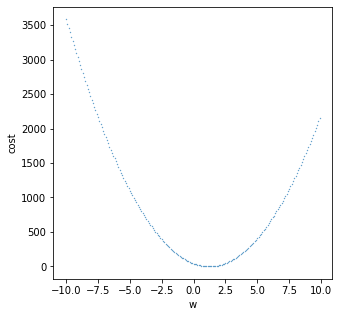

In [9]:
# 앞선 실행한 H를 for 문을 통한 자동화로 H 확인
list_c, list_w = [], []    # list_c: cost 저장 list / list_w: weight 저장 list
for i in range(-100, 100): 
    w = i * 0.1
    h = H(w)
    c = cost(h, x, y)

    # 10개의 parameter w의 값과 loss function 보기
    if i <= 10 and i >= 0:
        print("Parameter w의 값: {} - Loss Function: {}".format(round(w,2), round(c,2)))

    # loss function storage
    list_w.append(w)
    list_c.append(c)

# loss function visualization
plt.figure(figsize = (5,5))    
plt.scatter(list_w, list_c, s = 0.1)
plt.xlabel('w')
plt.ylabel('cost')

[-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]
[3582.2, 3269.825, 2971.7, 2687.825, 2418.2, 2162.825, 1921.7, 1694.825, 1482.2, 1283.825, 1099.7, 929.825, 774.2, 632.825, 505.7, 392.825, 294.2, 209.825, 139.7, 83.825, 42.2, 14.825, 1.7, 2.825, 18.2, 47.825, 91.7, 149.825, 222.2, 308.825, 409.7, 524.825, 654.2, 797.825, 955.7, 1127.825, 1314.2, 1514.825, 1729.7, 1958.825]


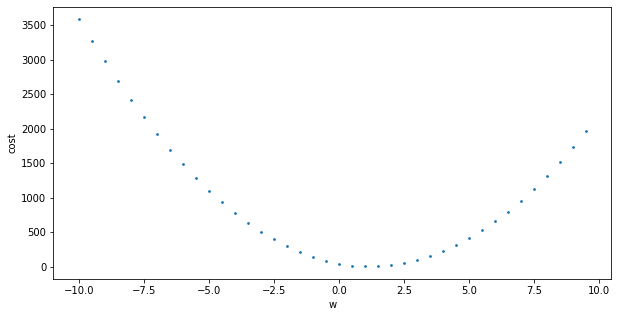

In [10]:
list_w = []  #weight값 담을 리스트
list_c = []  #cost값 담을 리스트
for i in range(-20, 20):
    w = i * 0.5
    h = H(w)
    c = cost(h, x, y)
    list_w.append(w)
    list_c.append(c)
    
print(list_w) #w값 print
print(list_c) #c값 print

plt.figure(figsize=(10,5))
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=3)

### 5. Gradient Descent Algorithm 
- 특정 w 근방에서의 w에 대한 편미분을 구하기
<br>

[1] 수치적 
- $ w = 4 $ 지점과 $ w = 4 + eps $ 인 지점에서 cost 값을 각각 구한 후 차이를 구해 Gradient 구하는 방식 <br>

[2] 편미분 공식 대입(해석적)
- cost function을 $w$ 편미분 공식을 통해 바로 특정 $w$에서의 Gradient 구하는 방식

1.2105213157896242 0.43684210597565787 1.2105263157894737 0.43684210526315803


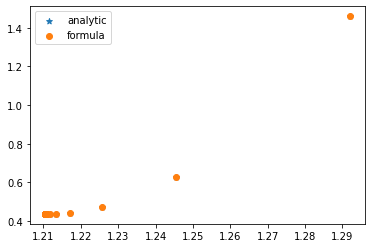

In [13]:
# 1. 수치해석적 Gradient 근사 
def cal_grad(w, cost):    # gradient 계산(수치 해석 / 근사)
    h = H(w)              # 모델(Hporthesis)을 생성
    cost1 = cost(h, x, y) # error 계산(MSE)
    eps = 0.00001  
    h = H(w + eps)        # w에서 eps 만큼 떨어진 곳에 모델 생성
    cost2 = cost(h, x, y) # error 계산
    
    dcost = cost2 - cost1 # 두 개(w와 w+eps) 사이의 error 계산
    dw = eps             

    grad = dcost / dw     # gradient 계산
    return grad, (cost1 + cost2) / 2

# 2. 편미부한 공식에 바로 대입하여 계산
def cal_grad2(w, cost): 
    h = H(w)                # 모델(Hporthesis)을 생성
    grad = 0                # gradient 초기화(초기 설정)
    for i in range(len(x)): # 편미분 후 grade 계산
        grad += 2 * (h.forward(x[i]) - y[i]) * x[i]
    grad = grad / len(x)    # gradient 평균 계산
    c = cost(h, x, y)       # cost fucntion 통해 cost 값 
    return grad, c


w1 = 1.4
w2 = 1.4
lr = 0.01 # Hyperparameter Tunning(problem fitting value selected)

# weight와 error(cost)를 저장할 list 정의 
list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100): # 총 100번의 Iteration(반복)을 통해서 학습을 진행
    grad, mean_cost = cal_grad(w1, cost)      # 수치해석적 방법으로 cost, grad 계산
    grad2, mean_cost2 = cal_grad2(w2, cost)   # 편미분 공식 대입으로 cost, grad 계산

    w1 -= lr * grad                           # w1 updata
    w2 -= lr * grad2                          # w2 updata
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)
    
print(w1, mean_cost, w2, mean_cost2) # w1 과 w2 를 출력해보니 둘다 1.21 정도로 비슷한 값으로 수렴
  
# 매 Iteration에서의 w 값과 cost 값을 그래프 상에 찍어보면 둘이 거의 정확하게 같은 지점을 통과하므로 초록색 동그라미가 파란색 별표를 가리네요
plt.scatter(list_w1, list_c1, label='analytic', marker='*')
plt.scatter(list_w2, list_c2, label='formula')
plt.legend()

#### Compare Training process of Two Models Initialized from Different w value

1.2105263157894737 0.43684210526315803 1.2105263157894737 0.43684210526315803


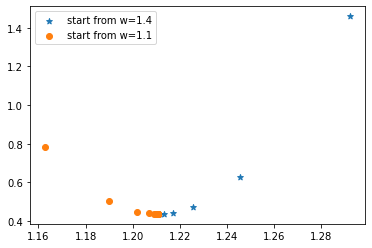

In [14]:
# 서로 다른 parameter에서 시작할 때 어떻게 변하는지 확인
w1 = 1.4
w2 = 1.1
lr = 0.01

list_w1 = []
list_c1 = []
list_w2 = []
list_c2 = []

for i in range(100): # 총 100번의 Iteration(반복)을 통해서 학습을 진행해봅시다.
    grad, mean_cost = cal_grad2(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)

    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)
    
print(w1, mean_cost, w2, mean_cost2) # w1 과 w2 를 출력해보니 둘다 1.21 정도로 비슷한 값으로 수렴
  
# 결론: 서로 다른 지점 시작하더라도, 학습 진행 과정에서 파라미터(w=1.21)로 수렴하는 양상 확인
plt.scatter(list_w1, list_c1, label='start from w=1.4', marker='*')
plt.scatter(list_w2, list_c2, label='start from w=1.1')
plt.legend()